<a href="https://colab.research.google.com/github/huaqiwen/connect5-js/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [10]:
import pandas as pd

In [12]:
df_dict = {
    'id': ['id1','id2','id3','id4','id5','id6'],
    'v1': [1,2,3,4,5,6],
    'v2': ['t','t','f','t','f','f'],
    'v3': [6.3,9.2,3.3,8.9,4.7,7.2],
    'v4': ['t','t','f','t','t','f'],
    'v_date' : pd.date_range(start='2021-01-07',end='2021-01-12'),
}

In [14]:
my_df = pd.DataFrame(df_dict, index = df_dict['id'])
my_df

,id,v1,v2,v3,v4,v_date
id1,id1,1,t,6.3,t,2021-01-07
id2,id2,2,t,9.2,t,2021-01-08
id3,id3,3,f,3.3,f,2021-01-09
id4,id4,4,t,8.9,t,2021-01-10
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


In [15]:
my_df.iloc[0]   # 1st row

id                        id1
v1                          1
v2                          t
v3                        6.3
v4                          t
v_date    2021-01-07 00:00:00
Name: id1, dtype: object

In [16]:
my_df.iloc[0, 0]    # 1st row, 1st col

'id1'

In [20]:
my_df.iloc[:, 1]    # 2nd col (first selects all rows, then 2nd col)

id1    1
id2    2
id3    3
id4    4
id5    5
id6    6
Name: v1, dtype: int64

In [21]:
my_df.loc['id4']

id                        id4
v1                          4
v2                          t
v3                        8.9
v4                          t
v_date    2021-01-10 00:00:00
Name: id4, dtype: object

In [22]:
my_df.loc['id4', 'v1']

4

In [28]:
# conditions
my_df[my_df.v_date > '2021-01-10']

,id,v1,v2,v3,v4,v_date
id5,id5,5,f,4.7,t,2021-01-11
id6,id6,6,f,7.2,f,2021-01-12


In [30]:
# shape gives a tuple representing the dimension of a data frame
my_df[(my_df.v1 > 3) & (my_df.v2 == 'f')].shape

(2, 6)

In [31]:
# summarize 
my_df.describe()

,v1,v3
count,6.000000,6.00000
mean,3.500000,6.60000
std,1.870829,2.32379
min,1.000000,3.30000
25%,2.250000,5.10000
50%,3.500000,6.75000
75%,4.750000,8.47500
max,6.000000,9.20000


# Matplotlib

In [32]:
import matplotlib.pyplot as plt

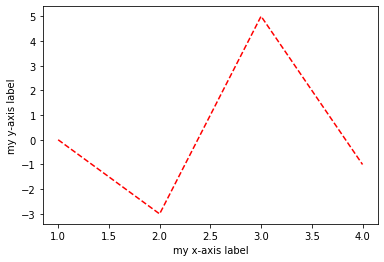

In [35]:
plt.plot([1, 2, 3, 4], [0, -3, 5, -1], 'r--')    # the last argument is options. '--': dashed line, 'o': points, 'r': red color
plt.ylabel('my y-axis label')
plt.xlabel('my x-axis label')
plt.show()

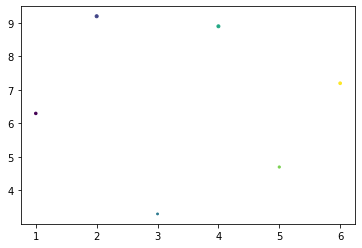

In [38]:
# use plt.scatter and plot data dict
# c is for colors, and s is for sizes
plt.scatter('v1', 'v3', c='v1', s='v3', data=df_dict)
plt.show()

In [39]:
# plot the means from v1 for each v2 groups
v2_means = my_df.groupby(['v2']).mean()
v2_means

,v1,v3
v2,,
f,4.666667,5.066667
t,2.333333,8.133333


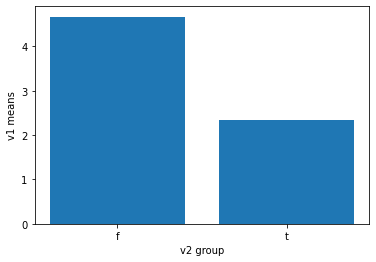

In [40]:
# plot the means from v1 for each v2 groups CONT'D
plt.bar(v2_means.index, v2_means.v1)
plt.xlabel('v2 group')
plt.ylabel('v1 means')
plt.show()

# Seaborn

In [41]:
import seaborn as sns

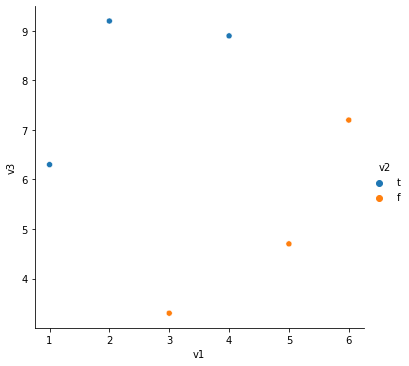

In [44]:
# create a plot of v1 vs v3, colored by v2
sns.relplot(data=my_df, x='v1', y='v3', hue='v2')

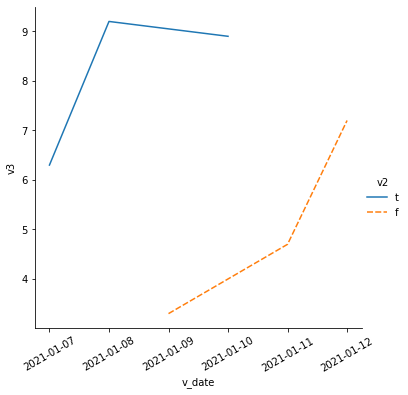

In [51]:
# some other options
my_plot = sns.relplot(data=my_df, x='v_date', y='v3', hue='v2', style='v2', kind='line')
my_plot.set_xticklabels(rotation = 30)    # rotate x label to avoid overlaps